# Convolutional VAE Style Transfer

This project is an experimental attempt to transfer artistic style learned from a series of paintings onto a video sequence by fitting a variational autoencoder with 512 codes to both paintings and video frames, isolating the mean feature-space embeddings and modifying the video's embeddings to be closer to the painting's.

Because the general quality of the VAE is relatively low, a convolutional post-processing network based on residual connections was trained with the purpose of making the resulting image less similar to the VAE's generated output and more similar to the original input images.

This makes the processing pipeline consist of a encoder, variational embedding, decoder and a generator; sort of a three-quarter deep convolutional VAEGAN architecture minus the adversarial training. No cross-validation, dropout or regularization procedure has been used in order to get the networks to as closely fit the inputs as possible. 

Image frame size was limited to 320x180 because of memory limitations; The VAE uses 6 layers with increasing feature map sizes in an attempt to make up for this. Training the whole network took about three days on an nVidia GTX 980TI.

## Training inputs

The paintings and videos used are:

* [Leonid Afremov](http://leonidafremov.deviantart.com/gallery/)'s DeviantArt gallery
* [Disclosure - Magnets](https://www.youtube.com/watch?v=b_KfnGBtVeA) music video
* [Wim - See You Hurry](https://vimeo.com/22328077) music video

Finally, the trained VAE was used on an unrelated video,

* [Pentatonix - Daft Punk](https://www.youtube.com/watch?v=3MteSlpxCpo)

## Resulting media

The script creates video-only MP4 files to which I added back the music from the original videos using `ffmpeg`.

The Pentatonix video can be found in the zip file. Because of the general file sizes though, the remaining videos have been uploaded to Vimeo instead. For copyright reasons, the videos are protected with the password

    cadl

You can find the videos here

* [CADL VAE Style Transfer on Pentatonix - Daft Punk](https://vimeo.com/202984113)
* [CADL VAE Style Transfer on Wim - See You Hurry](https://vimeo.com/202979720)
* [CADL VAE Style Transfer on Disclosure - Magnets](https://vimeo.com/202991439)

of which the Pentatonix one is by far the most interesting, because the network had to make things up on its own.
For See You Hurry and Magnets, movement is a bit choppy since the network was only trained on every tenth frame. It can also be seen that faster motion tends to correlate with more colorful rendition, whereas the fog in the See You Hurry video doesn't do the video any favor at all.

In order to get a cleaner outcome, I assume a real VAEGAN approach might be more fruitful.

## Training process

Data is extracted using `extract_tiles.py` and written to `.tfrecord.gz` files for later usage. The `preview_tiles.py` script is used to validate correctness.

`train_vae.py` performs the actual training based on the TFRecord files. The network was pre-trained using See You Hurry and the Afremov paintings, to which I later added the Magnets video frames (that part went well). Learning that VAE is _very_ slow, although adding another training set did not appear to make it worse. I stopped training the VAE after approximately two days and left the refining network running for about 16 hours, at which point improvement was noticeable, yet very subtle.

The `export_graphs.py` script takes the network checkpoints produced by TensorFlow's Supervisor and exports them as reusable protocol buffer files. The `evaluate*.py` load these files in order to perform inference and some tests on the latent embedding vectors.

Finally, `mogrify_video.py` is used to process videos using the network.

### Impressions from the training process

After the VAE training reached a certain point, convergence slowed down. This is a screenshot about eight hours into the learning process ...

![VAE training](log/preview-20170205-231757.jpg)

... while this is about four hours later.

![VAE training, four hours later](log/preview-20170206-013356.jpg)

A learning cycle over about 9000 batch iterations is assembled here:

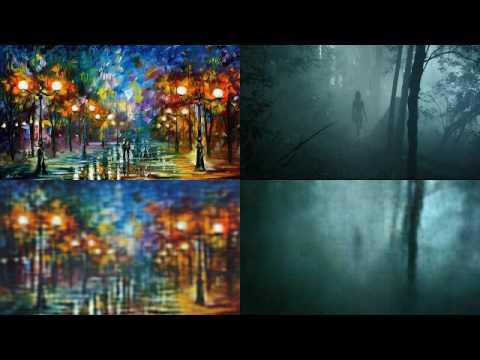

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('dTUmzAW4t3A')


### Impressions from the refinement network

The below screenshot shows the output of the VAE on the top and the refined images on the bottom; note that the images appear to feature sharper edges and smoother areas.

![Refinement network after 10 hours](log/preview-refine-20170207-144602.jpg)